In [11]:
import hpSPMPlusStudio as hps
from hpSPMPlusStudio import NMICommand,NMIEndpoint,NMIDevice
import time

print(hps.help())
sts = "ResponseStatus"

hpSPM+ API package:
Version: 1.0.0

Docs:
c:\Users\bugra.pak\AppData\Local\Programs\Python\Python312\Lib\site-packages\hpSPMPlusStudio\Docs
  hpSPMPlus_API_manual_v1.0.1.pdf
  hpSPMPlus_API_manual_v1.0.2.pdf

Samples:
c:\Users\bugra.pak\AppData\Local\Programs\Python\Python312\Lib\site-packages\hpSPMPlusStudio\Samples
  Basics
  Experiments
  __init__.py
  __pycache__
None


In [12]:
Endpoint = NMIEndpoint("192.168.10.105",9024)
Device = NMIDevice(Endpoint)
Scan = Device.SCAN()
XYOffsetController = Device.XYOFFSET()
Status = Device.STATUS()
AutoTune = Device.AUTOTUNE()

AutoTune.StopTune()

{'ResponseStatus': True, 'message': 'Successful'}

In [13]:
commands = AutoTune.Get_Commands()

print("Get Commands:")
for command in commands:
    if (command.startswith("Get_")):
        print(command)
        
print("Set Commands:")
for command in commands:
    if (command.startswith("Set_")):
        print(command)

Get Commands:
Get_Commands
Get_IsTunning
Get_FrequencySlopeTypes
Get_IsInit
Get_IsCenterSpan
Get_ExcitationPercent
Get_Excitation
Get_FrequencyStartInHertz
Get_FrequencyEndInHertz
Get_FrequencyIncrementInHertz
Get_Delay
Get_StartDelay
Get_FrequencySlopeType
Get_MaxSlopeFrequency
Get_MaxSlopeRms
Get_MinSlopeFrequency
Get_MinSlopeRms
Get_MaxRmsFrequency
Get_MaxRms
Get_CoarseRmsSeries
Get_CoarsePhaseSeries
Get_FineRmsSeries
Get_FinePhaseSeries
Set Commands:
Set_Initialize
Set_ExcitationPercent
Set_Excitation
Set_FrequencyStartInHertz
Set_FrequencyEndInHertz
Set_FrequencyIncrementInHertz
Set_Delay
Set_StartDelay
Set_CenterSpanType
Set_StartEndType
Set_FrequencySlope


In [14]:
AutoTune.Set_Delay(1)
AutoTune.Set_Excitation(0.1)
AutoTune.Set_ExcitationPercent(10)
AutoTune.Set_FrequencyStartInHertz(1000)
AutoTune.Set_FrequencyEndInHertz(100000)


{'ResponseStatus': True, 'message': 'Successful'}

In [15]:
print(AutoTune.Get_IsTunning())
print(AutoTune.Get_IsInit())

{'ResponseStatus': True, 'IsTunning': False, 'message': 'Successful'}
{'ResponseStatus': True, 'IsInit': True, 'message': 'Successful'}


In [16]:

AutoTune.Set_Initialize()
if(AutoTune.Get_IsInit()[sts] and AutoTune.StartTune()[sts]):
    time.sleep(2)
    print("Tuning Started")
    while(AutoTune.Get_IsTunning()["IsTunning"]):    
        time.sleep(0.5)
    AutoTune.StopTune()
    print("Tuning Completed")
else:
    print("Tuning Failed")
    

Tuning Started
Tuning Completed


In [17]:
commands = ['Get_MaxSlopeFrequency',
            'Get_MaxSlopeRms',
            'Get_MinSlopeFrequency',
            'Get_MinSlopeRms',
            'Get_MaxRmsFrequency',
            'Get_MaxRms',
            'Get_CoarseRmsSeries',
            'Get_CoarsePhaseSeries',
            'Get_FineRmsSeries',
            'Get_FinePhaseSeries']

CoarseRmsSeriesKeys = AutoTune.Get_CoarseRmsSeries()["Keys"]
CoarseRmsSeriesValues = AutoTune.Get_CoarseRmsSeries()["Values"]

CoarsePhaseSeriesKeys = AutoTune.Get_CoarsePhaseSeries()["Keys"]
CoarsePhaseSeriesValues = AutoTune.Get_CoarsePhaseSeries()["Values"]

for command in commands:
    method = getattr(AutoTune, command, None)
    if (callable(method)):
        print(command, method())


Get_MaxSlopeFrequency {'ResponseStatus': True, 'Frequency': 3602.62891809909, 'message': 'Successful'}
Get_MaxSlopeRms {'ResponseStatus': True, 'Rms': 0.0043799230800000005, 'message': 'Successful'}
Get_MinSlopeFrequency {'ResponseStatus': True, 'Frequency': 3602.62891809909, 'message': 'Successful'}
Get_MinSlopeRms {'ResponseStatus': True, 'Rms': 0.0043799230800000005, 'message': 'Successful'}
Get_MaxRmsFrequency {'ResponseStatus': True, 'Frequency': 1500.505561172902, 'message': 'Successful'}
Get_MaxRms {'ResponseStatus': True, 'Rms': 0.026264061720000002, 'message': 'Successful'}
Get_CoarseRmsSeries {'ResponseStatus': True, 'Keys': [1000, 1100.1011122345803, 1200.2022244691607, 1300.303336703741, 1400.4044489383216, 1500.505561172902, 1600.6066734074823, 1700.7077856420628, 1800.8088978766432, 1900.9100101112235, 2001.0111223458039, 2101.112234580384, 2201.2133468149646, 2301.314459049545, 2401.4155712841257, 2501.5166835187056, 2601.6177957532864, 2701.7189079878663, 2801.820020222

In [18]:
import matplotlib.pyplot as plt
import numpy as np

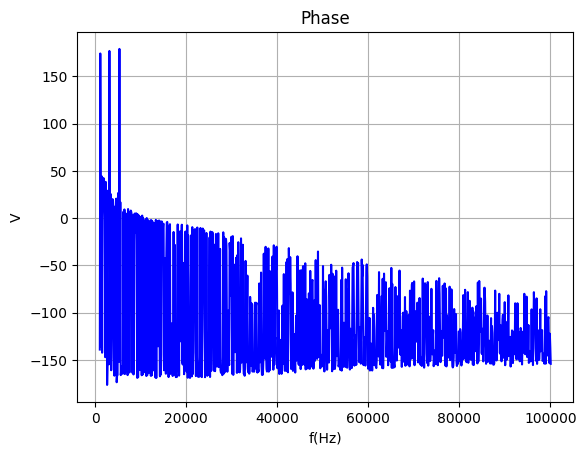

In [19]:
plt.plot(CoarsePhaseSeriesKeys, CoarsePhaseSeriesValues, marker='', linestyle='-', color='b')
plt.title("Phase")
plt.xlabel("f(Hz)")
plt.ylabel("Degree(°)")
plt.grid(True)
plt.show()

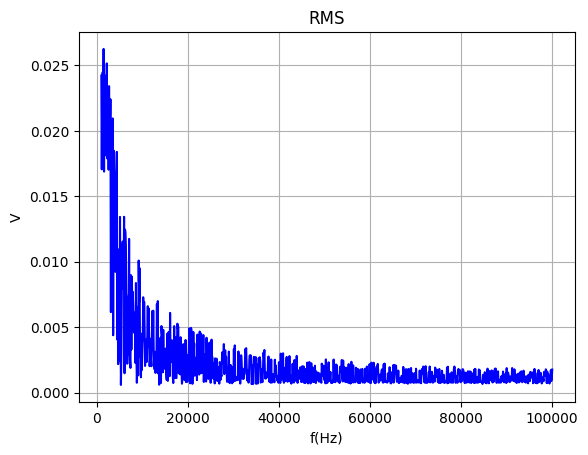

In [20]:
plt.plot(CoarseRmsSeriesKeys, CoarseRmsSeriesValues, marker='', linestyle='-', color='b')
plt.title("RMS")
plt.xlabel("f(Hz)")
plt.ylabel("V")
plt.grid(True)
plt.show()